In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import tensorflow_hub as hub
tf.enable_eager_execution()

import pandas as pd
import glob
import shutil

from tensorflow.keras import layers
print(tf.__version__)

1.15.0-rc3


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
file_name="/content/drive/My Drive/color.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
dataset='/content/color/Apple___Apple_scab'

In [0]:
len(dataset)

33

In [0]:
import os

In [0]:
data=os.listdir('/content/color')
len(data)

38

In [0]:
apple_data=os.listdir('/content/color/Apple___Apple_scab')

In [0]:
len(apple_data)

630

In [0]:
image_paths=[]
for i in apple_data:
  image_paths.append(os.path.join('/content/color/Apple___Apple_scab',i))

In [0]:
image_paths[1]

'/content/color/Apple___Apple_scab/b1efda88-84a3-4d96-b3bf-48d7e12155e9___FREC_Scab 3009.JPG'

In [0]:
img=plt.imread(image_paths[1])

In [0]:
dataset=os.listdir('/content/color')

In [0]:
len(dataset)

38

In [0]:
num_label=0
for example in dataset:
  num_label+=1

In [0]:
num_label

38

In [0]:
base_dir=os.listdir('/content/color')
len(base_dir)

38

In [0]:
classes=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','Blueberry___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Raspberry___healthy','Soybean___healthy','Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']

In [0]:
len(classes)

38

In [0]:
project_path='/content/color'
for cl in classes:
  images = glob.glob('/content/color'+'/'+cl+'/*.JPG')
  print("{}: {} Images".format(cl, len(images)))
  train, val,test = images[:round(len(images)*0.7)], images[round(len(images)*0.7):round(len(images)*0.9)],images[round(len(images)*0.9):]
  
  for t in train:
    if not os.path.exists(os.path.join(project_path, 'train', cl)):
      os.makedirs(os.path.join(project_path, 'train', cl))
    shutil.move(t, os.path.join(project_path, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(project_path, 'val', cl)):
      os.makedirs(os.path.join(project_path, 'val', cl))
    shutil.move(v, os.path.join(project_path, 'val', cl))
  for t in test:
    if not os.path.exists(os.path.join(project_path, 'test', cl)):
      os.makedirs(os.path.join(project_path, 'test', cl))
    shutil.move(t, os.path.join(project_path, 'test', cl))  

Apple___Apple_scab: 630 Images
Apple___Black_rot: 621 Images
Apple___Cedar_apple_rust: 275 Images
Apple___healthy: 1645 Images
Blueberry___healthy: 1502 Images
Cherry_(including_sour)___Powdery_mildew: 1052 Images
Cherry_(including_sour)___healthy: 854 Images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 446 Images
Corn_(maize)___Common_rust_: 1192 Images
Corn_(maize)___Northern_Leaf_Blight: 870 Images
Corn_(maize)___healthy: 21 Images
Grape___Black_rot: 1180 Images
Grape___Esca_(Black_Measles): 1383 Images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 Images
Grape___healthy: 423 Images
Orange___Haunglongbing_(Citrus_greening): 5507 Images
Peach___Bacterial_spot: 2297 Images
Peach___healthy: 360 Images
Pepper,_bell___Bacterial_spot: 997 Images
Pepper,_bell___healthy: 1476 Images
Potato___Early_blight: 1000 Images
Potato___Late_blight: 1000 Images
Potato___healthy: 152 Images
Raspberry___healthy: 371 Images
Soybean___healthy: 5090 Images
Squash___Powdery_mildew: 1813 Images
Str

In [0]:
train_dir=os.listdir('/content/color/train')
val_dir=os.listdir('/content/color/val')
test_dir=os.listdir('/content/color/test')

In [0]:
len(test_dir)
len(val_dir)
len(test_dir)

38

In [0]:
IMG_SHAPE=256
BATCH_SIZE=32

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)
test_image_generator=ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/train',
        shuffle=True,
        target_size=(IMG_SHAPE,IMG_SHAPE),
        class_mode='binary')

Found 36961 images belonging to 38 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/val',
        shuffle=False,
        target_size=(IMG_SHAPE,IMG_SHAPE),
        class_mode='binary')

Found 10561 images belonging to 38 classes.


In [0]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
        directory='/content/color/test',
        shuffle=False,
        target_size=(IMG_SHAPE,IMG_SHAPE),
        class_mode='binary')

Found 5281 images belonging to 38 classes.


In [0]:
train_dir[0]

'Apple___Apple_scab'

In [0]:
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [0]:
feature_extractor.trainable=False

In [0]:
model=tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(38,activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 38)                77862     
Total params: 21,880,646
Trainable params: 77,862
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [0]:
EPOCHS=6
history=model.fit_generator(
                   train_data_gen,
                   epochs=EPOCHS,
                   validation_data=val_data_gen)

Epoch 1/6
1156/1156 [==============================] - 1012s 876ms/step - loss: 0.3838 - acc: 0.8892 - val_loss: 0.3234 - val_acc: 0.9001
Epoch 2/6
1156/1156 [==============================] - 1008s 872ms/step - loss: 0.2463 - acc: 0.9268 - val_loss: 0.2574 - val_acc: 0.9170
Epoch 3/6
1156/1156 [==============================] - 1008s 872ms/step - loss: 0.1935 - acc: 0.9418 - val_loss: 0.2382 - val_acc: 0.9209
Epoch 4/6
1156/1156 [==============================] - 1008s 872ms/step - loss: 0.1598 - acc: 0.9511 - val_loss: 0.2403 - val_acc: 0.9227
Epoch 5/6
1156/1156 [==============================] - 1008s 872ms/step - loss: 0.1370 - acc: 0.9580 - val_loss: 0.2517 - val_acc: 0.9168
Epoch 6/6
1156/1156 [==============================] - 1008s 872ms/step - loss: 0.1218 - acc: 0.9619 - val_loss: 0.2478 - val_acc: 0.9212


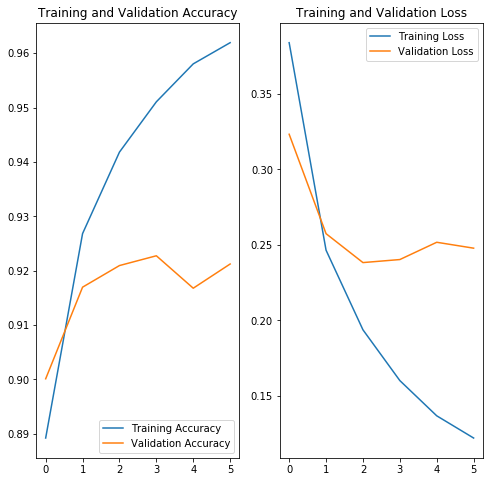

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [0]:
class_names=np.array(classes)

In [0]:
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
def load_image(img_path,show=True):
  img = image.load_img(img_path, target_size=(256, 256))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255  
  if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

  return img_tensor

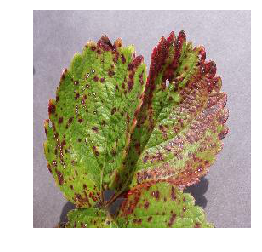

In [0]:
img_path='/content/color/test/Strawberry___Leaf_scorch/0c685839-d936-42aa-be57-fb90a416528b___RS_L.Scorch 0808.JPG'
new_image=load_image(img_path)
pred=model.predict_classes(new_image)

In [0]:
class_names[pred]

array(['Strawberry___Leaf_scorch'], dtype='<U50')

In [0]:
image_batch,label_batch=next(iter(test_data_gen))

In [0]:
len(image_batch)

32

In [0]:
predicted_batch=model.predict(image_batch)
predicted_batch=tf.squeeze(predicted_batch).numpy()
predicted_ids=np.argmax(predicted_batch,axis=-1)
predicted_class_names=class_names[predicted_ids]
predicted_class_names

array(['Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___healthy',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab',
       'Tomato___Bacterial_spot', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       'Apple___Black_rot'], dtype='<U50')

In [0]:
print("Labels:",label_batch)
print("Predicted labels:",predicted_ids)

Labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted labels: [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 28
  0  0  0  0  0  0  0  1]


In [0]:
predicted_class_names[0].title

<function str_.title>

In [0]:
plt.figure(figsize=(20,20))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color="blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n],color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct,red: incorrect)")
  

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import time

In [0]:
t=time.time()
export_path_sm="./{}.h5".format(int(t))
print(export_path_sm)
tf.saved_model.save(model,export_path_sm)

./1571083257.h5


In [0]:
!ls {export_path_sm}

assets	saved_model.pb	variables


In [0]:
!zip -r model.zip {export_path_sm}

  adding: 1571083257.h5/ (stored 0%)
  adding: 1571083257.h5/assets/ (stored 0%)
  adding: 1571083257.h5/variables/ (stored 0%)
  adding: 1571083257.h5/variables/variables.data-00001-of-00002 (deflated 7%)
  adding: 1571083257.h5/variables/variables.index (deflated 81%)
  adding: 1571083257.h5/variables/variables.data-00000-of-00002 (deflated 89%)
  adding: 1571083257.h5/saved_model.pb (deflated 93%)


In [0]:
!ls

1571083257.h5  color  drive  model.zip	sample_data


In [0]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 51904, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil